
# (A) Dataset
### Data Cleaning Exercise
### Praveen Prabhakar Nayak
### SJSU ID: 015258425
### CMPE 255


Downloaded from Kaggle - California Housing Prices  
https://www.kaggle.com/camnugent/california-housing-prices



In [343]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib
import matplotlib.pyplot as plt # for plotting
from sklearn.model_selection import train_test_split # splitting data
from sklearn.model_selection import StratifiedShuffleSplit # Provides train/test indices to split data in train/test sets
from sklearn.impute import SimpleImputer #helpful in handling the missing data in the predictive model dataset
from pandas.plotting import scatter_matrix  #Draw a matrix of scatter plots
from sklearn.preprocessing import OrdinalEncoder # Encode categorical features as an integer array.

#  Mounting Google Drive

In [344]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#  Reading Data from Google Drive

In [345]:
california_housing_data = pd.read_csv('/content/gdrive/MyDrive/data/housing.csv')

# View Data Sample

In [346]:
california_housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# (B) Data Cleaning
#  Check for null values in the cloumns of the dataset

In [347]:
california_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Check for null values in the cloumns of the dataset

In [348]:
print(california_housing_data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [349]:
california_housing_data[california_housing_data.isnull().any(axis=1)] # any missing data in columns


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


#  View Graphically Missing Data

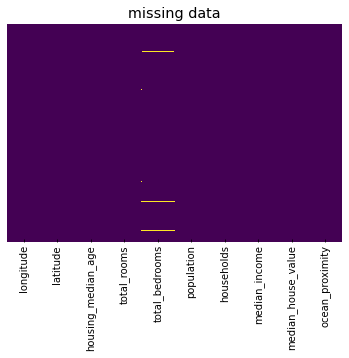

In [350]:
sns.heatmap(california_housing_data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

plt.title('missing data')
plt.show()

# Pre Processing I - Impute missing data using unsupervised model

In [351]:
from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe 
def impute_knn(df):
    
    ''' inputs: pandas df containing feature matrix '''
    ''' outputs: dataframe with NaN imputed '''
    # imputation with KNN unsupervised method

    # separate dataframe into numerical/categorical
    ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan 

    for col in cols_nan:                
        imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ldf.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[df[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ldf,ldf_putaside],axis=1)

In [352]:
# Call function that imputes missing data
df2 = impute_knn(california_housing_data)
# looks like we have a full feature matrix
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [353]:
df2 = df2.drop('ocean_proximity',axis=1)

In [354]:
Xs2 = df2[['longitude','latitude','housing_median_age','total_rooms',
        'total_bedrooms','population','households','median_income']]
ys2 = df2['median_house_value']

# Prepare Training Data set

In [355]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs2, ys2, test_size = 0.3, random_state = 0)

# Train model using RandomForest Classifier - note MSE value

In [356]:
# Build the model with Random Forest Classifier :
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [357]:
y_pred = model.predict(X_test)

In [358]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

68120.31100703301

# Identify the right value of K (number of clusters)

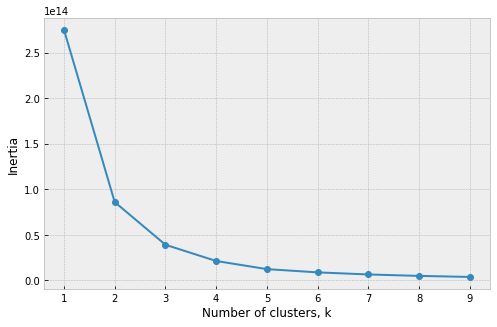

In [359]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df2)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [360]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [361]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_test)
y_kmeans = kmeans.predict(X_test)

# Apply Kmeans - note MSE value

In [362]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_kmeans)**(0.5)
mse

236962.9880133208

# Pre Processing II - Impute missing data using Simple Imputer

In [363]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy='median')#In this case its better to use the median to replace missing values

In [364]:
ft_data = california_housing_data.drop('ocean_proximity',axis=1)


In [365]:
imputer.fit(ft_data)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [366]:
X = imputer.transform(ft_data)


In [367]:
ft_transformed = pd.DataFrame(X,columns=ft_data.columns)
ft_transformed.tail() #The missing values in total_bedrooms were replaced by the median value


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0


In [368]:
ft_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Visualization - Identify high value house located ~Inference near bay value of the house is highest

<Figure size 720x504 with 0 Axes>

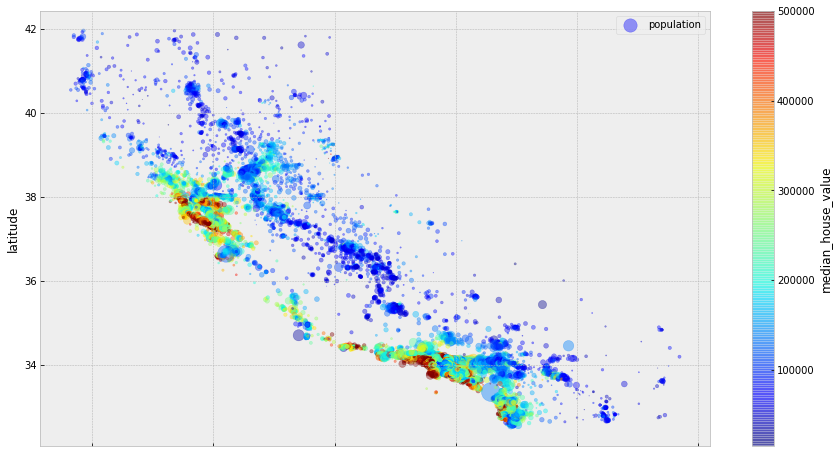

In [369]:
plt.figure(figsize=(10,7))
ft_transformed.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=ft_transformed["population"]/100, label="population", figsize=(15,8),
        c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,
    )
plt.legend()

In [370]:
ft_transformed["rooms_per_household"]=ft_transformed["total_rooms"]/ft_transformed["households"]
ft_transformed["bedrooms_per_room"]=ft_transformed["total_bedrooms"]/ft_transformed["total_rooms"]
ft_transformed["population_per_household"]=ft_transformed["population"]/ft_transformed["households"]

In [371]:
corr_matrix=ft_transformed.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

In [372]:
Xs = ft_transformed[['longitude','latitude','housing_median_age','total_rooms',
        'total_bedrooms','population','households','median_income']]
ys = ft_transformed['median_house_value']

# Prepare Training Data set

In [373]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size = 0.3, random_state = 0)

In [374]:
# Build the model with Random Forest Classifier :
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

# Train model using RandomForest Classifier -  note MSE value

In [375]:
# Build the model with Random Forest Classifier :
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [376]:
y_pred = model.predict(X_test)


In [377]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

68126.3666645792

# Identify the right value of K (number of clusters)

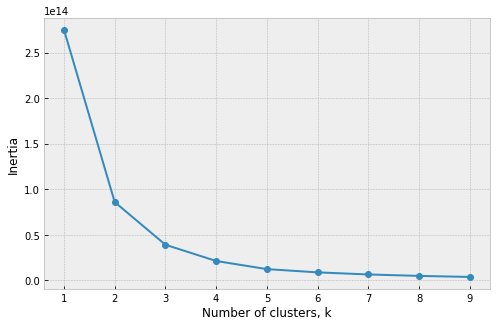

In [378]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(ft_transformed)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [379]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [380]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_test)
y_kmeans = kmeans.predict(X_test)

# Apply Kmeans - note MSE value

In [381]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_kmeans)**(0.5)
mse

236963.61515093892

Steps Performed:
1. I have used two ways of imputing values as part of preprocessing.
2. I have visualizations to locate high value houses and to identify missing data.
3. I have used two ways of model training.



Outcome:
1. Results of MSE by imputing data using unsupervised model has slightly lower value and hence can be considered as the best trained model compared to data imputed by simple imputer.
2. There was negligible change in value of MSE when the model was trained using kmeans.